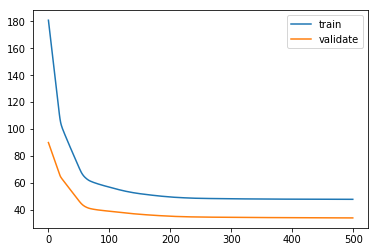

In [1]:
import numpy as np
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
import matplotlib.pylab as plt

data = load_svmlight_file('./australian_scale')
x_train,x_validate,y_train,y_validate = train_test_split(data[0],data[1],test_size=0.33)
x_train = x_train.todense()
x_validate = x_validate.todense()
init_w = np.zeros(shape=[15,1])#将b塞进w
another = np.ones(shape=[462,1])
another1 = np.ones(shape=[228,1])
x_train = np.hstack((x_train,another))
x_validate = np.hstack((x_validate,another1))#分别将训练集与验证集加多一列，全为1
c = 0.4
learning_rate = 0.0001

w = init_w
sum = np.zeros(shape=[1,15])
round = 500
loss_train = []
loss_test = []

for i in range(round):
    sum = 0
    for j in range(x_train.shape[0]):
        if 1 - (y_train[j] * (np.dot(w.T, x_train[j].T))).tolist()[0][0] >= 0:
            g_w = -np.dot(np.mat(y_train[j]),np.mat(x_train[j]))
            sum += g_w

    w = w - (learning_rate * (w + (c * sum).T))

    #Hinge LOss 中的||w||平方
    total_w = np.dot(w.T,w)


    total_ao_train=0
    total_ao_test=0
    #Hinge Loss 中的另一部分
    for z in range(x_train.shape[0]):
        total_ao_train += max(0,1 - (y_train[z] * (np.dot(w.T, x_train[z].T))).tolist()[0][0])

    for n in range(x_validate.shape[0]):
        total_ao_test += max(0,1 - (y_validate[n] * (np.dot(w.T, x_validate[n].T))).tolist()[0][0])

    hinge_loss_train = 0.5 *1/462 * total_w[0] + c * total_ao_train
    hinge_loss_test = 0.5 *1/228* total_w[0] + c * total_ao_test

    loss_train.append(hinge_loss_train.tolist()[0][0])
    loss_test.append(hinge_loss_test.tolist()[0][0])


plt.plot(np.arange(0,round),loss_train,label=u'train')
plt.plot(np.arange(0,round),loss_test,label=u'validate')
plt.legend()
plt.show()
